In [13]:
import pandas as pd
from sklearn.cluster import AgglomerativeClustering
from collections import Counter
import seaborn as sn
import matplotlib.pyplot as plt

In [14]:
# Upload the data
df = pd.read_csv("FINAL.csv")
df

Player Pos  Age   Tm    G  GS    MP   FG   FGA       FG%  ...  \
0     Precious Achiuwa  PF   21  MIA   61   4   737  124   228  0.543860  ...   
1         Jaylen Adams  PG   24  MIL    7   0    18    1     8  0.125000  ...   
2         Steven Adams   C   27  NOP   58  58  1605  189   308  0.613636  ...   
3          Bam Adebayo   C   23  MIA   64  64  2143  456   800  0.570000  ...   
4    LaMarcus Aldridge   C   35  BRK   52  46  1348  280   592  0.472973  ...   
..                 ...  ..  ...  ...  ...  ..   ...  ...   ...       ...  ...   
536       Delon Wright  PG   28  SAC  126  78  3496  480  1036  0.463320  ...   
537     Thaddeus Young  PF   32  CHI   68  23  1652  370   662  0.558912  ...   
538         Trae Young  PG   22  ATL   63  63  2125  487  1112  0.437950  ...   
539        Cody Zeller   C   28  CHO   48  21  1005  181   324  0.558642  ...   
540        Ivica Zubac   C   23  LAC   72  33  1609  257   394  0.652284  ...   

     ORB  DRB  TRB  AST  STL  BLK  TOV   PF   PTS    Salary  
0     73  135  208   29   20   28   43   91   304   2582160  
1      0    3    3    2    0    0    0    1     2    449115  
2    213  301  514  111   54   38   78  113   438  29592695  
3    142  431  573  346   75   66  169  145  1197   5115492  
4     38  198  236   98   22   58   54   94   704  17628340  
..   ...  ...  ...  ...  ...  ...  ...  ...   ...       ...  
536  130  408  538  556  202   60  166  150  1290   9000000  
537  168  255  423  291   74   40  137  152   823  13545000  
538   38  207  245  594   53   12  261  111  1594   6571800  
539  119  209  328   86   27   17   51  121   451  15415730  
540  189  330  519   90   24   62   81  187   650   7000000  

[541 rows x 30 columns]

In [15]:
df1 = df.loc[df["Pos"]=="SG"]

In [16]:
# Create the input variables
X = df1.drop(columns=["Player", "Tm", "Pos", "Salary"])

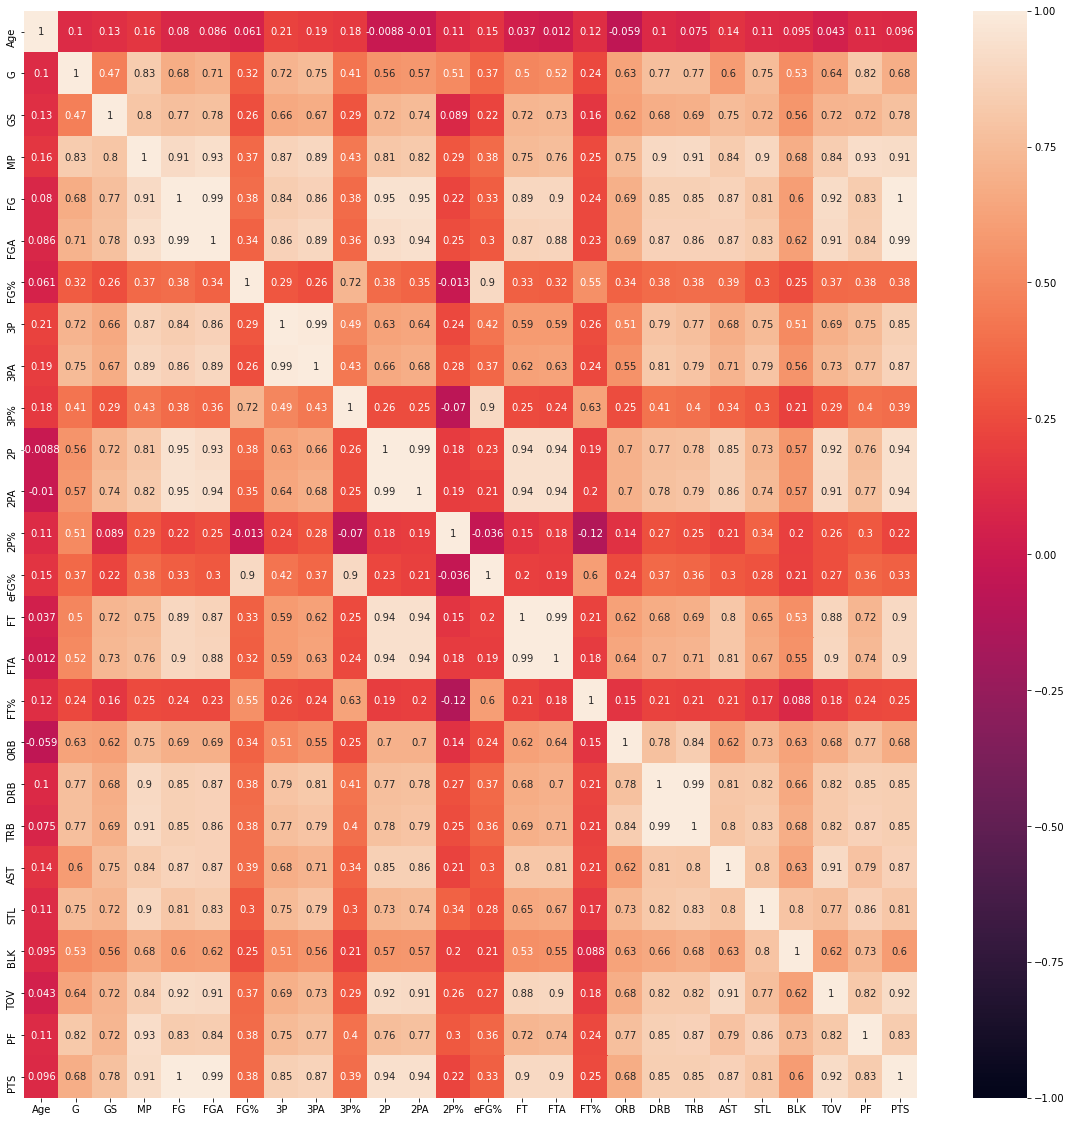

In [17]:
corrMatrix = X.corr()
plt.figure(figsize=(20, 20))
sn.heatmap(corrMatrix, vmin=-1, vmax=1, annot=True)
plt.show()

In [18]:
# Create the clustering model
#clustering = AgglomerativeClustering(n_clusters=int((len(X)/3))).fit(X)
clustering = AgglomerativeClustering(n_clusters=13).fit(X)
Counter(clustering.labels_)

Counter({11: 18,
         12: 10,
         6: 17,
         8: 7,
         1: 17,
         4: 8,
         10: 2,
         3: 9,
         2: 15,
         7: 5,
         5: 15,
         9: 2,
         0: 2})

In [19]:
df1["Label"] = clustering.labels_
df1

<ipython-input-19-2c8a5e937266>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["Label"] = clustering.labels_


Player Pos  Age   Tm   G  GS    MP   FG  FGA       FG%  \
5           Ty-Shon Alexander  SG   22  PHO  15   0    47    3   12  0.250000   
6    Nickeil Alexander-Walker  SG   22  NOP  46  13  1007  192  458  0.419214   
7               Grayson Allen  SG   25  MEM  50  38  1259  173  414  0.417874   
23               Dwayne Bacon  SG   25  ORL  72  50  1853  292  726  0.402204   
28               Desmond Bane  SG   22  MEM  68  17  1519  234  499  0.468938   
..                        ...  ..  ...  ...  ..  ..   ...  ...  ...       ...   
497          Denzel Valentine  SG   27  CHI  62   3  1036  155  416  0.372596   
499             Fred VanVleet  SG   26  TOR  52  52  1899  338  870  0.388506   
508             Lonnie Walker  SG   22  SAS  60  38  1522  256  609  0.420361   
516    Quinndary Weatherspoon  SG   24  SAS  20   0   121   16   35  0.457143   
519             Derrick White  SG   26  SAS  36  32  1064  186  453  0.410596   

     ...  DRB  TRB  AST  STL  BLK  TOV   PF   PTS    Salary  Label  
5    ...    8   10    6    0    1    3    2     9    449115     11  
6    ...  131  144  102   47   22   69   88   508   3113160     12  
7    ...  141  160  108   46    8   48   71   532   2545320      6  
23   ...  193  224   93   45    5   46  103   788   1678854      8  
28   ...  179  210  118   41   16   59  125   625   1936440      1  
..   ...  ...  ...  ...  ...  ...  ...  ...   ...       ...    ...  
497  ...  173  197  105   30    7   42   70   406   4642800      6  
499  ...  188  220  328   87   37   95  119  1019  21250000      7  
508  ...  141  155  101   29   15   65  101   669   2895720      1  
516  ...    8   11    8    8    2   10   18    46    449115     11  
519  ...   94  107  127   26   36   45   91   553   3516284     12  

[127 rows x 31 columns]

In [20]:
df1.loc[df1["Label"]==3]

Player Pos  Age   Tm    G  GS    MP   FG  FGA  \
49               Eric Bledsoe  SG   31  NOP   71  70  2111  307  730   
86   Kentavious Caldwell-Pope  SG   27  LAL   67  67  1902  218  506   
128          Donte DiVincenzo  SG   24  MIL   66  66  1814  253  603   
203               Gary Harris  SG   26  ORL   78  76  2160  276  690   
224            Justin Holiday  SG   31  IND   72  52  2183  258  625   
233             Kevin Huerter  SG   22  ATL   69  49  2126  316  731   
337              Ben McLemore  SG   27  LAL  106  10  1810  270  730   
382               Isaac Okoro  SG   20  CLE   67  67  2173  235  559   
428           Josh Richardson  SG   27  DAL   59  56  1790  264  618   

          FG%  ...  DRB  TRB  AST  STL  BLK  TOV   PF  PTS    Salary  Label  
49   0.420548  ...  215  244  268   55   24  114  112  869  16875000      3  
86   0.430830  ...  152  179  127   62   26   66  114  653  12073020      3  
128  0.419569  ...  299  380  203   72   15   91  112  688   3044160      3  
203  0.400000  ...  116  158  156   56   22   74  142  776  19610714      3  
224  0.412800  ...  224  256  119   74   41   54  135  756   5720400      3  
233  0.432285  ...  193  231  241   82   18   79  165  822   2761920      3  
337  0.369863  ...  170  200   78   46   18   84  176  812   2893630      3  
382  0.420394  ...  138  206  128   62   24   86  185  646   6400920      3  
428  0.427184  ...  144  195  153   61   24   79  130  715  10865952      3  

[9 rows x 31 columns]

In [21]:
player_label = df1.loc[df1["Player"]=="Eric Bledsoe"]["Label"].values[0]
player_label

3

In [22]:
output = df1.loc[df1["Label"]==player_label].reset_index().drop(columns=["index"])
output

Player Pos  Age   Tm    G  GS    MP   FG  FGA       FG%  \
0              Eric Bledsoe  SG   31  NOP   71  70  2111  307  730  0.420548   
1  Kentavious Caldwell-Pope  SG   27  LAL   67  67  1902  218  506  0.430830   
2          Donte DiVincenzo  SG   24  MIL   66  66  1814  253  603  0.419569   
3               Gary Harris  SG   26  ORL   78  76  2160  276  690  0.400000   
4            Justin Holiday  SG   31  IND   72  52  2183  258  625  0.412800   
5             Kevin Huerter  SG   22  ATL   69  49  2126  316  731  0.432285   
6              Ben McLemore  SG   27  LAL  106  10  1810  270  730  0.369863   
7               Isaac Okoro  SG   20  CLE   67  67  2173  235  559  0.420394   
8           Josh Richardson  SG   27  DAL   59  56  1790  264  618  0.427184   

   ...  DRB  TRB  AST  STL  BLK  TOV   PF  PTS    Salary  Label  
0  ...  215  244  268   55   24  114  112  869  16875000      3  
1  ...  152  179  127   62   26   66  114  653  12073020      3  
2  ...  299  380  203   72   15   91  112  688   3044160      3  
3  ...  116  158  156   56   22   74  142  776  19610714      3  
4  ...  224  256  119   74   41   54  135  756   5720400      3  
5  ...  193  231  241   82   18   79  165  822   2761920      3  
6  ...  170  200   78   46   18   84  176  812   2893630      3  
7  ...  138  206  128   62   24   86  185  646   6400920      3  
8  ...  144  195  153   61   24   79  130  715  10865952      3  

[9 rows x 31 columns]

In [23]:
for index, row in output.iterrows():
    print(row["Player"], index)

Eric Bledsoe 0
Kentavious Caldwell-Pope 1
Donte DiVincenzo 2
Gary Harris 3
Justin Holiday 4
Kevin Huerter 5
Ben McLemore 6
Isaac Okoro 7
Josh Richardson 8
